In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = tf.reshape(train_images, [-1,28,28,1])
test_images = tf.reshape(test_images, [-1,28,28,1])

In [4]:
model_3 = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3),activation='relu', input_shape = (28,28,1)),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(64,(3,3),activation='relu'),
            keras.layers.Conv2D(64,(3,3),activation='relu'),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(128,(3,3),activation='relu'),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10,activation= 'softmax')])

In [5]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 128)         7

In [6]:
model_3.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [7]:
model_3.fit(train_images,train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2321 - accuracy: 0.9500
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0440 - accuracy: 0.9864
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0393 - accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0311 - accuracy: 0.9907


In [8]:
test_loss, accuracy = model_3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ',test_loss)
print('Test accuracy : ',accuracy)

313/313 - 1s - loss: 0.0562 - accuracy: 0.9834 - 852ms/epoch - 3ms/step

Test loss :  0.056219518184661865
Test accuracy :  0.9833999872207642


In [9]:
test_images = tf.cast(test_images, tf.float32)
pred = model_3.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 1s 3ms/step


In [10]:
print('Prediction : ',pred.shape)
print('Test labels : ',test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

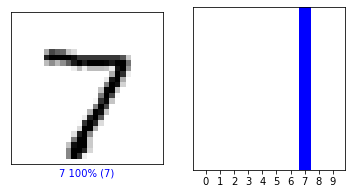

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()


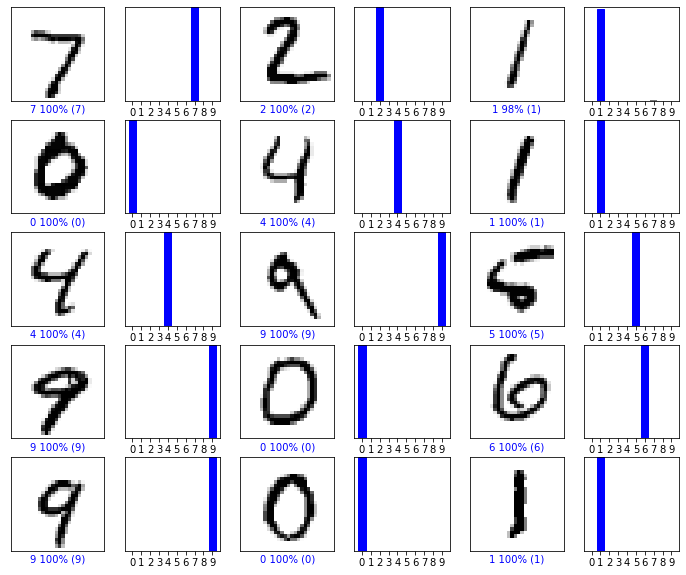

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

In [15]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [16]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[48, 104, 115, 250, 376, 381, 412, 420, 445, 447]


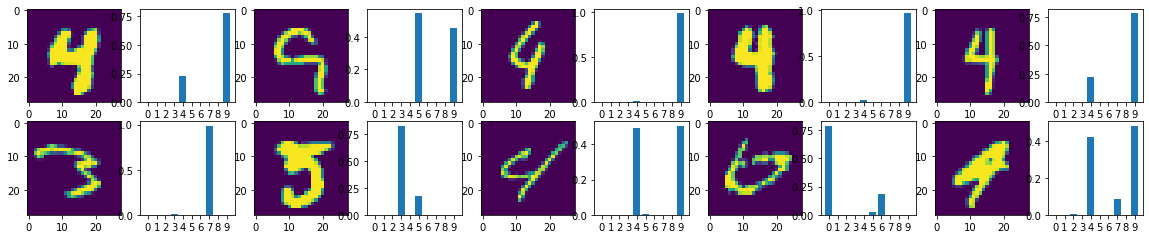

In [17]:
plot_error(index_slice, pred, test_labels)

In [ ]:
Done